<a href="https://colab.research.google.com/github/svfrolov/YP-project/blob/main/%E2%84%968_%D0%92%D1%8B%D0%B1%D0%BE%D1%80_%D0%BB%D0%BE%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%B4%D0%BB%D1%8F_%D1%81%D0%BA%D0%B2%D0%B0%D0%B6%D0%B8%D0%BD%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Инструкция по выполнению проекта

1.0. **Загрузите и подготовьте данные. Поясните порядок действий.**


2.0. **Обучите и проверьте модель для каждого региона:**
 
 2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
 
 
 2.2. Обучите модель и сделайте предсказания на валидационной выборке.
 
 
 2.3. Сохраните предсказания и правильные ответы на валидационной выборке.
 
 
 2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
 
 
 2.5. Проанализируйте результаты.


**Подготовьтесь к расчёту прибыли:**


 3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.


 3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 


 3.3. Напишите выводы по этапу подготовки расчёта прибыли.
Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:


 4.1. Выберите скважины с максимальными значениями предсказаний. 


 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.


 4.3. Рассчитайте прибыль для полученного объёма сырья.


**Посчитайте риски и прибыль для каждого региона:**


 5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.


 5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.


 5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

# Описание данных

Данные геологоразведки трёх регионов находятся в файлах: 
* `/datasets/geo_data_0.csv.`
* `/datasets/geo_data_1.csv.`
* `/datasets/geo_data_2.csv.`

id — уникальный идентификатор скважины;


f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);


product — объём запасов в скважине (тыс. баррелей).

# Условия задачи:

* Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).


* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.


* Бюджет на разработку скважин в регионе — 10 млрд рублей.


* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.


* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.


* Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler
from scipy import stats

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
RANDOM_SEED = 54

In [ ]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')

geo_data_0.info()
print()
print("Дубликаты:", geo_data_0.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Дубликаты: 0


In [ ]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


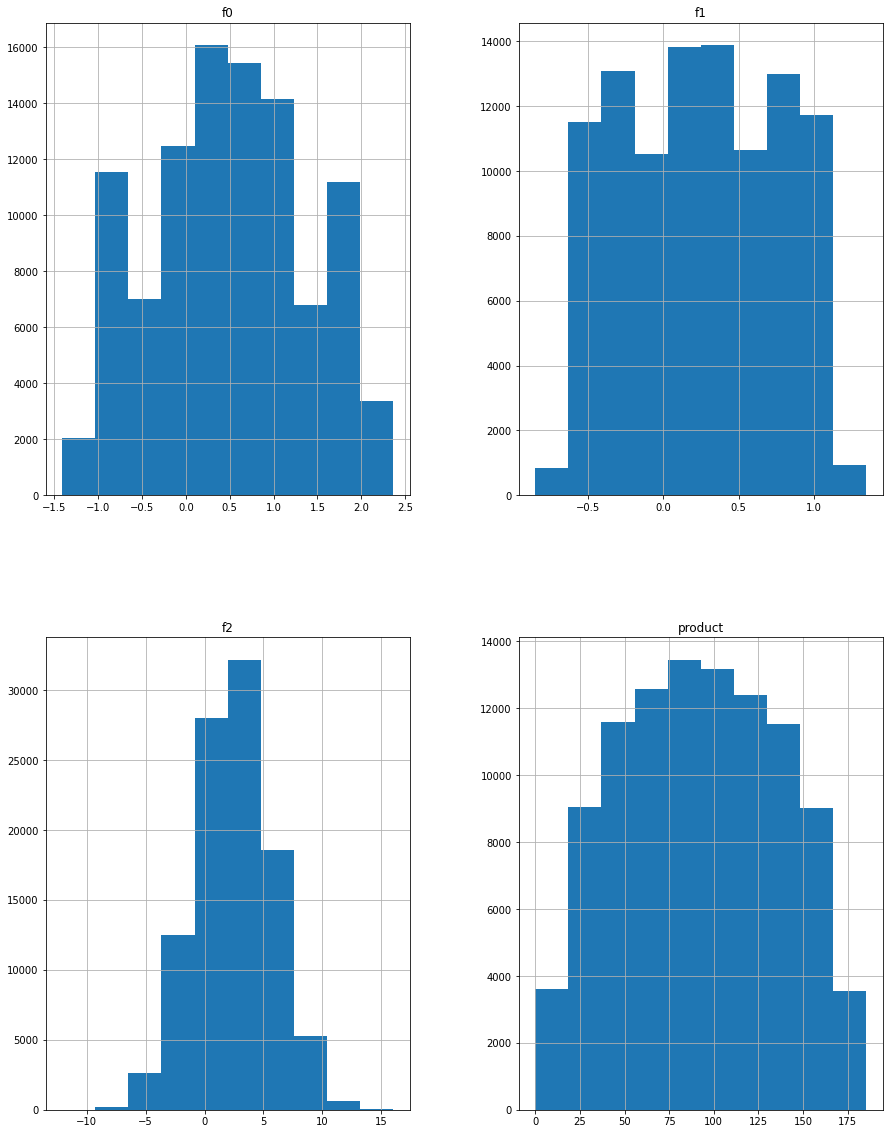

In [ ]:
geo_data_0.hist(figsize=(15, 20));

In [ ]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')

geo_data_1.info()
print()
print("Дубликаты:", geo_data_0.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Дубликаты: 0


In [ ]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


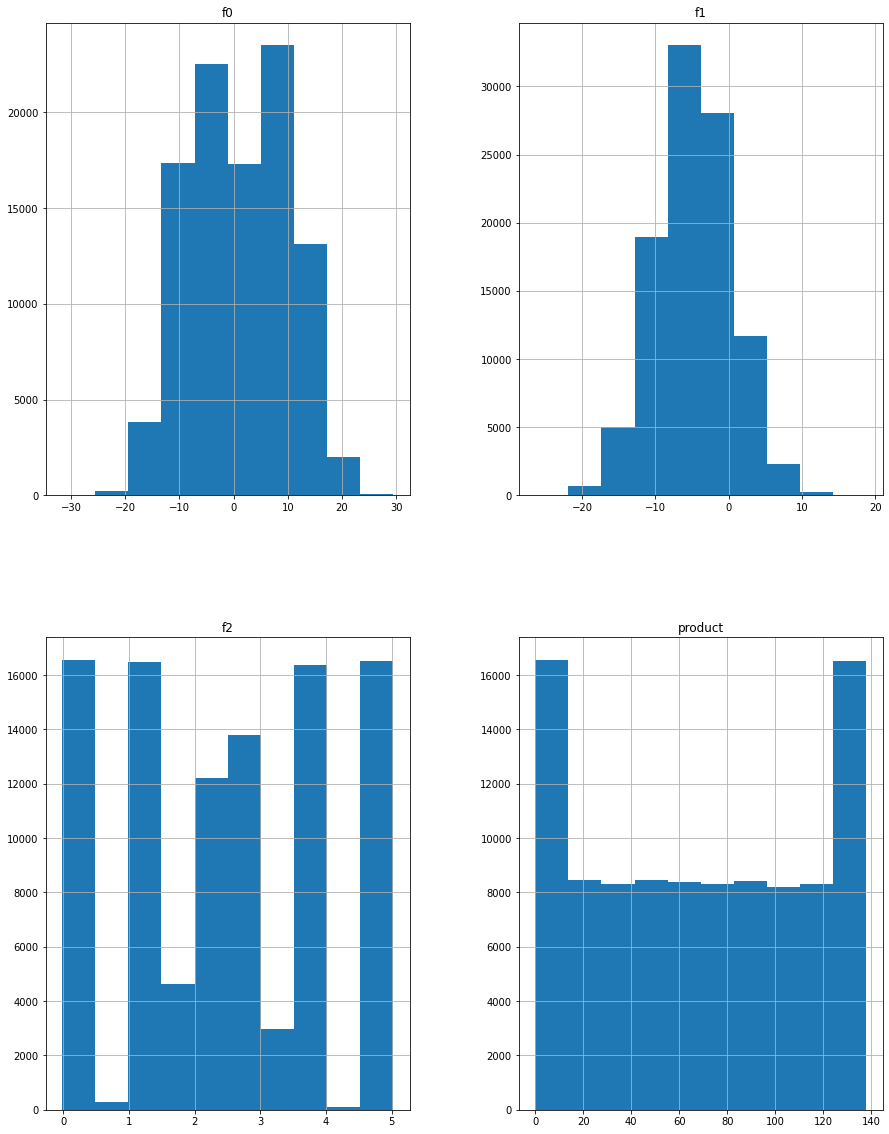

In [ ]:
geo_data_1.hist(figsize=(15, 20));

In [ ]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

geo_data_2.info()
print()
print("Дубликаты:", geo_data_0.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Дубликаты: 0


In [ ]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [ ]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


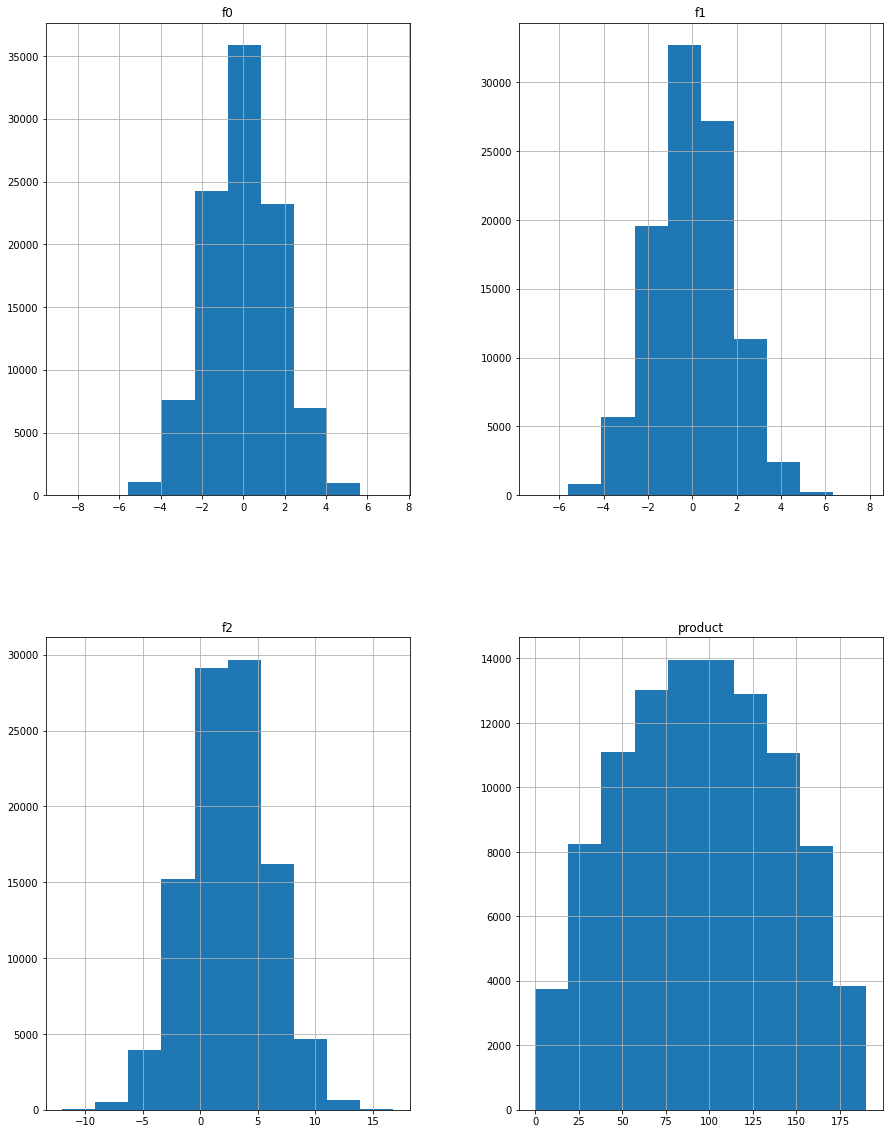

In [ ]:
geo_data_2.hist(figsize=(15, 20));

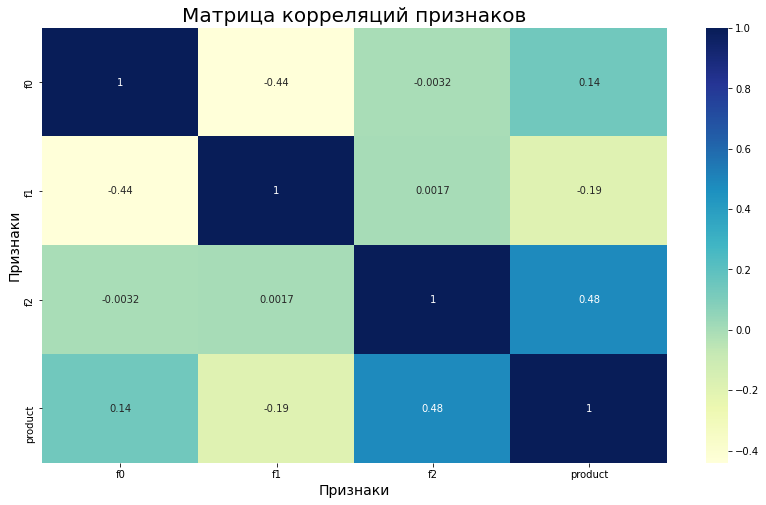

In [ ]:
matr_0 = geo_data_0.corr()
plt.figure(figsize=(14,8))
sns.heatmap(matr_0, annot = True, cmap="YlGnBu", square=False)

plt.title('Матрица корреляций признаков', fontsize = 20)
plt.xlabel('Признаки', fontsize = 14)
plt.ylabel('Признаки', fontsize = 14)
plt.show()

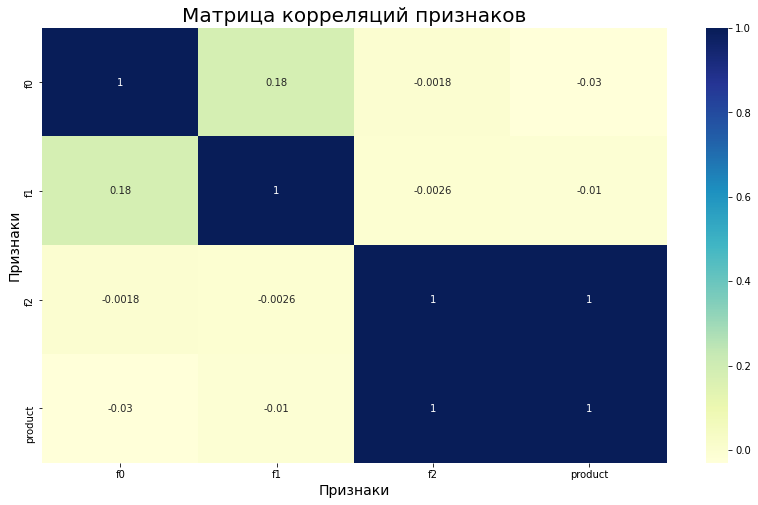

In [ ]:
matr_1 = geo_data_1.corr()
plt.figure(figsize=(14,8))
sns.heatmap(matr_1, annot = True, cmap="YlGnBu", square=False)

plt.title('Матрица корреляций признаков', fontsize = 20)
plt.xlabel('Признаки', fontsize = 14)
plt.ylabel('Признаки', fontsize = 14)
plt.show()

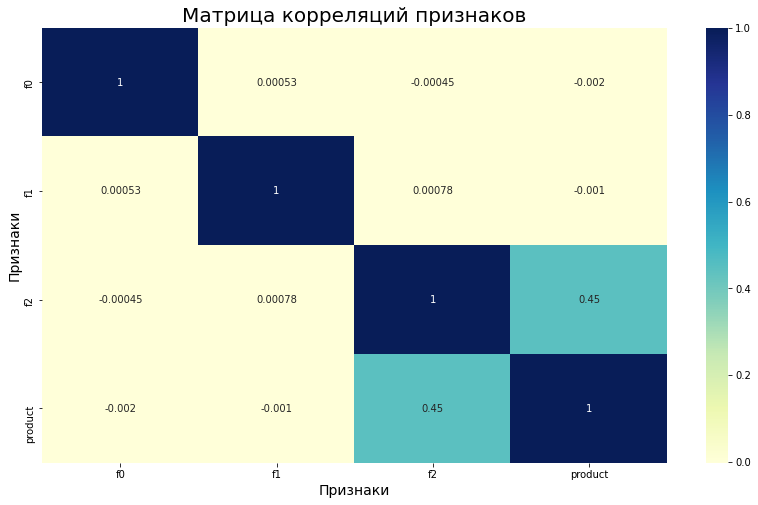

In [ ]:
matr_2 = geo_data_2.corr()
plt.figure(figsize=(14,8))
sns.heatmap(matr_2, annot = True, cmap="YlGnBu", square=False)

plt.title('Матрица корреляций признаков', fontsize = 20)
plt.xlabel('Признаки', fontsize = 14)
plt.ylabel('Признаки', fontsize = 14)
plt.show()

Явная корреляция есть только во втором варианте

Данные полные. Готовы к работе. Удалим id, существенно не влияет.

In [ ]:
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

In [ ]:
def hist_n(seria, bins, xlim_max, ylim_max):
    plt.figure(figsize=[14,8])

    plt.hist(seria, bins=bins)

    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])

    plt.xlabel("Нефти на скважину,  тыс.барелей")
    plt.ylabel("Количество скважин")

    plt.title("Гистограмма распределения по объему скважин")
    plt.show()

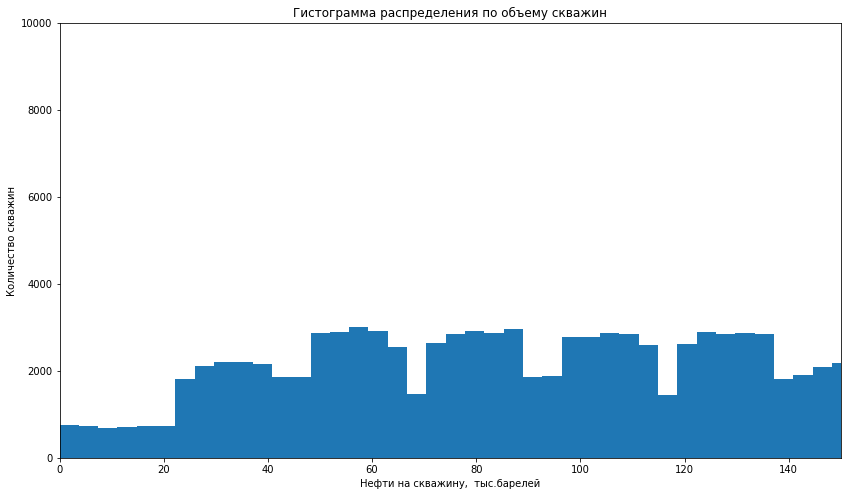

In [ ]:
hist_n(geo_data_0['product'], 50, 150, 10000)

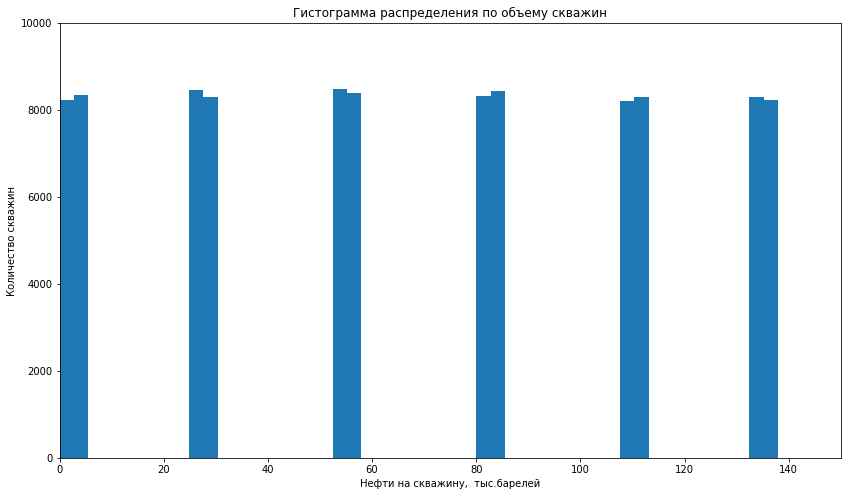

In [ ]:
hist_n(geo_data_1['product'], 50, 150, 10000)

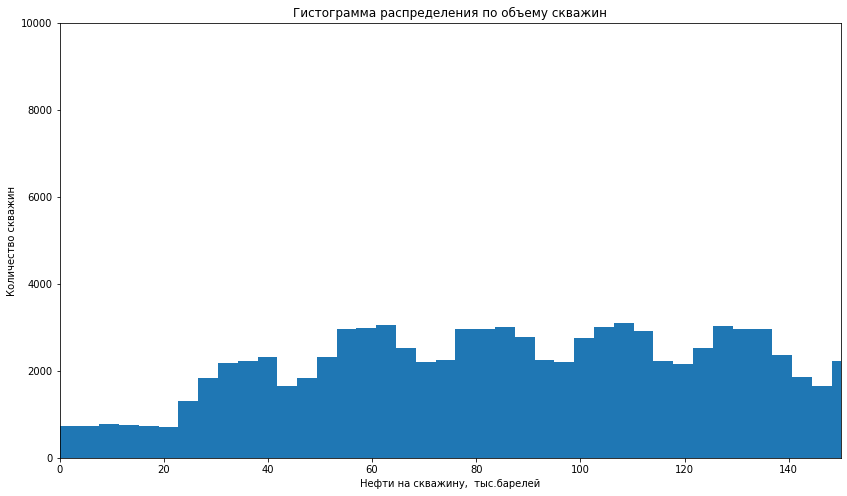

In [ ]:
hist_n(geo_data_2['product'], 50, 150, 10000)

В первом и третьем варианте нормальное распределениею Во втором странное распределение.

## Обучение и проверка модели

In [ ]:
features_0 = geo_data_0.drop(['product'], axis = 1)
target_0 = geo_data_0['product']

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size = 0.25, random_state = 12345)

print(target_train_0.shape, target_valid_0.shape)

(75000,) (25000,)


In [ ]:
features_1 = geo_data_1.drop(['product'], axis = 1)
target_1 = geo_data_1['product']

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size = 0.25, random_state = 12345)

print(target_train_1.shape, target_valid_1.shape)

(75000,) (25000,)


In [ ]:
features_2 = geo_data_2.drop(['product'], axis = 1)
target_2 = geo_data_2['product']

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size = 0.25, random_state = 12345)

print(target_train_2.shape, target_valid_2.shape)

(75000,) (25000,)


Объявили переменные и разбили данные

In [ ]:
train_features_m = [features_train_0, features_train_1, features_train_2]
train_targets_m = [target_train_0, target_train_1, target_train_2]

valid_features_m = [features_valid_0, features_valid_1, features_valid_2]
valid_targets_m = [target_valid_0, target_valid_1, target_valid_2]

predictions_m = []

for numer_geo in range(len(train_features_m)):
    model = LinearRegression()
    model.fit(train_features_m[numer_geo], train_targets_m[numer_geo])
    predictions = model.predict(valid_features_m[numer_geo])
    predictions_m.append(pd.Series(predictions))
    print()
    print('RMSE №' + str(numer_geo + 1), mean_squared_error(valid_targets_m[numer_geo], predictions) ** 0.5)
    print('Cреднее количество нефти', predictions.mean())


RMSE №1 37.5794217150813
Cреднее количество нефти 92.59256778438035

RMSE №2 0.893099286775617
Cреднее количество нефти 68.728546895446

RMSE №3 40.02970873393434
Cреднее количество нефти 94.96504596800489


## Подготовка к расчёту прибыли

In [ ]:
budget = 10 ** 10
best_toch = 200
stoim_bar = 450000

In [ ]:
rec_volume = budget / stoim_bar / best_toch
print('Одна скважина должна добывать - ', round(rec_volume + 1), 'тыс.бар. \n')

Одна скважина должна добывать -  112 тыс.бар. 



In [ ]:
print(budget)
print()
print('добывает первый вариант - ', round(geo_data_0['product'].mean()), 'тыс.бар')
print()
print('добывает второй вариант - ', round(geo_data_1['product'].mean()), 'тыс.бар')
print()
print('добывает третий вариант - ', round(geo_data_2['product'].mean()), 'тыс.бар')

10000000000

добывает первый вариант -  93 тыс.бар

добывает второй вариант -  69 тыс.бар

добывает третий вариант -  95 тыс.бар


При необходимом количестве 112 тыс.бар, ни один из вариантов столько не добывает.

## Расчёт прибыли и рисков 

In [ ]:
def doch(target, probabilities, count):
    sort = probabilities.sort_values(ascending=False)
    selected = target[sort.index][:count].sum()
    vib = selected * stoim_bar
    return (vib - budget) / 10 ** 9

for i in range(3):
    print('Вариант №' +  str(i + 1), 'прибыль - ', doch(valid_targets_m[i].reset_index(drop=True), predictions_m[i], 200))

Вариант №1 прибыль -  3.3208260431398506
Вариант №2 прибыль -  2.4150866966815108
Вариант №3 прибыль -  2.7103499635998327


Вариант №1 самый прибыльный

### Bootstrap

https://practicum.yandex.ru/trainer/data-scientist/lesson/81ee4ea9-958e-4df2-abbd-2b50916f6b3c/task/fea9c8ba-a234-4565-95f8-d81a7b2f8da7/?hideTheory=1

In [ ]:
values = [[],[],[]]
state = np.random.RandomState(12345)

for i in range(3):
    for ind in range(1000):
        target_sample = valid_targets_m[i].reset_index(drop=True).sample(n = 500, replace = True, random_state=state)
        probs_subsample = predictions_m[i][target_sample.index]
        
        values[i].append(doch(target_sample, probs_subsample, 200))
        
    values[i] = pd.Series(values[i])
    print('Данные по варианту №' +  str(i + 1))
    print('95%-й доверительный интервал: (' + str(values[i].quantile(0.025)) + ' : ' + str(values[i].quantile(0.975)) + ')')
    print('Средняя прибыль:', values[i].mean())
    print('Риск убытка:', stats.percentileofscore(values[i], 0), ' \n')

Данные по варианту №1
95%-й доверительный интервал: (-0.10209009483793655 : 0.9479763533583688)
Средняя прибыль: 0.42593852691059236
Риск убытка: 6.0  

Данные по варианту №2
95%-й доверительный интервал: (0.12812323143308443 : 0.9536129820669085)
Средняя прибыль: 0.5182594936973248
Риск убытка: 0.30000000000000004  

Данные по варианту №3
95%-й доверительный интервал: (-0.11585260916001143 : 0.9896299398445739)
Средняя прибыль: 0.4201940053440501
Риск убытка: 6.2  



Первый и третий вариант исключаем, слишком большие риски. Принимае оставшийся второй вариант.

**Вывод:**
1. Загрузили и подготовили данные

2. Обучили модель для 3 вариантов

3. Составили расчёт прибыли

4. Посчитали прибыль и риски

**Второй вариант вышел одним из лучших**

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован